### KMeans Clustering

    

#### Loadin the required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score,precision_score,confusion_matrix,mean_absolute_error,mean_squared_error
%matplotlib inline

In [ ]:
import os
os.chdir("")

#### We work with the diabetes data. Since it has a target, we drop the target and consider only the independent attributes for the clustering activity

In [2]:

lables = ["Number of times pregnant",
"Plasma glucose concentration",
"Diastolic blood pressure (mm Hg)",
"Triceps skin fold thickness (mm)",
"2-Hour serum insulin (mu U/ml)",
"Body Mass Index",
"Diabetes pedigree function",
"Age (years)",
"Target"]
diabetics = pd.read_csv("Diabetes_Data.csv",names=lables)
diabetics.head()
diabetics.columns
diabetics['Target'] = diabetics['Target'].astype("category")
diabetics['Target'].value_counts()

0    500
1    268
Name: Target, dtype: int64

In [3]:
diabetics.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years),Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
numeric_vars = diabetics.drop(['Target'],axis=1)

In [5]:
numeric_vars.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body Mass Index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
# Divide  data in to train and test
  
X_train, X_test= train_test_split(numeric_vars, test_size=0.150) 

In [7]:
print(X_train.shape)
print(X_test.shape)

(652, 8)
(116, 8)


#### As mentioned during the preprocessing session, for any distance based algo, we need to standardize the data to bring all attributes to the same scale

In [8]:
std = StandardScaler()
std.fit(X_train)
X_train_std= std.transform(X_train)
X_test_std= std.transform(X_test)

In [9]:
X_train_std[0:5,:]

array([[-0.26865311,  1.12804711,  0.04273224,  0.57166836,  2.03725253,
         0.44783105, -0.39550364,  0.15693037],
       [-0.26865311, -0.27122158, -1.01062953, -0.66889669,  0.01296832,
        -0.32742121,  0.43737783, -0.71238656],
       [ 0.60861816,  1.25242655, -0.37861247, -1.28917922, -0.69511464,
        -0.99930651, -0.88578139,  1.46090576],
       [-0.26865311,  1.50118543, -0.27327629,  1.00586613,  1.1792226 ,
         0.31862234, -0.36006188, -0.27772809],
       [ 0.90104192, -0.24012672,  0.35874077, -0.23469892,  0.22122801,
        -1.06391086, -0.03517903, -0.1907964 ]])

In [28]:
X_train.index



# Hierarchical Clustering

In [29]:
#Define hierarchical clustering
Hclustering = AgglomerativeClustering(n_clusters=2,affinity='cosine', linkage='complete')

In [30]:
## Fit on input data
Hclustering.fit(X_train_std)


AgglomerativeClustering(affinity='cosine', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=2, pooling_func=<function mean at 0x7ff80c0ed1e0>)

In [31]:
Hclustering.labels_

{0: 1,
 1: 0,
 2: 0,
 3: 1,
 4: 0,
 5: 1,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 1,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 1,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 1,
 26: 0,
 27: 1,
 28: 0,
 29: 0,
 30: 0,
 31: 1,
 32: 0,
 33: 0,
 34: 0,
 35: 1,
 36: 0,
 37: 0,
 38: 1,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 0,
 45: 0,
 46: 1,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 1,
 52: 1,
 53: 1,
 54: 1,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 1,
 61: 1,
 62: 0,
 63: 1,
 64: 0,
 65: 1,
 66: 0,
 67: 1,
 68: 0,
 69: 1,
 70: 1,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 1,
 78: 0,
 79: 1,
 80: 0,
 81: 0,
 82: 1,
 83: 1,
 84: 0,
 85: 1,
 86: 1,
 87: 0,
 88: 1,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 1,
 99: 1,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 1,
 106: 0,
 107: 0,
 108: 1,
 109: 0,
 110: 1,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 1,
 122: 1,
 12

In [32]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

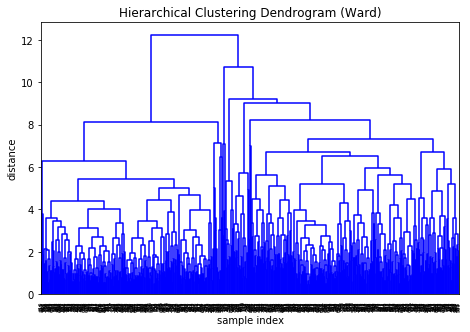

In [33]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(X_train_std, 'complete')
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    color_threshold=0,
)
plt.title('Hierarchical Clustering Dendrogram (Ward)')
plt.xlabel('sample index')
plt.ylabel('distance')
#plt.tight_layout()
plt.show()

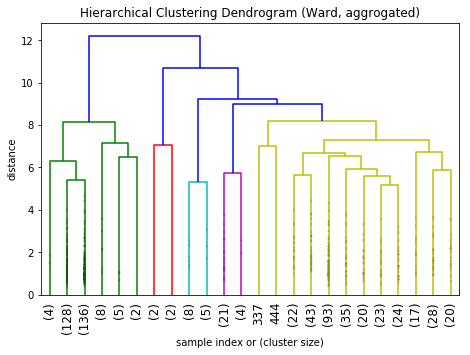

In [34]:
figure = plt.figure(figsize=(7.5, 5))
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    )
plt.title('Hierarchical Clustering Dendrogram (Ward, aggrogated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
plt.show()

# KMeans clustering

In [35]:
# Number of clusters
kmeans = KMeans(n_clusters=2,random_state=148461)
# Fitting the input data
kmeans = kmeans.fit(X_train_std)
# Getting the cluster labels
labels = kmeans.predict(X_train_std)
# Centroid values
centroids = kmeans.cluster_centers_

In [36]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=148461, tol=0.0001, verbose=0)

In [37]:
centroids

array([[-0.52843099, -0.22232657, -0.22873986,  0.09916336,  0.03791991,
        -0.04224132,  0.00690631, -0.58704799],
       [ 0.9630712 ,  0.40519258,  0.41688086, -0.18072629, -0.06910944,
         0.07698527, -0.01258682,  1.06990131]])

In [38]:
labels

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0,

In [39]:
# Getting the cluster labels for the test Data set
labels_test = kmeans.predict(X_test_std)


In [40]:
labels_test

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0], dtype=int32)

In [41]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_) #Total sum of squares for distance between each point and their corresponding cluster centroid

[[-0.52843099 -0.22232657 -0.22873986  0.09916336  0.03791991 -0.04224132
   0.00690631 -0.58704799]
 [ 0.9630712   0.40519258  0.41688086 -0.18072629 -0.06910944  0.07698527
  -0.01258682  1.06990131]]
4338.19716895


#### In the above case, we have randomly selected two clusters. But how would we know if two clusters is ideal... 
- THe clustering is said to be good, if the points in the cluster are closer to each other and the clusters themselves are far apart. The two quantities which describe the above said factors are "Within Sum of Squares (wss)" and "Between Sum of Squares(bss)" respectively. In kmeans python, wss is defined ad inertia. 
- Ideally, if wss is minimum, we have a better clustering. 
- Now the question is.. how do we choose k 

In [42]:
wss= {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_train_std)
    clusters = kmeans.labels_
    wss[k] = kmeans.inertia_ # Inertia: Sum of squared distances of samples to their closest cluster center
    

In [43]:
wss

{1: 5216.0,
 2: 4337.9945623874391,
 3: 3704.1993885407346,
 4: 3339.9712410695392,
 5: 3090.8168807672628,
 6: 2859.1771050216912,
 7: 2676.2003624319595,
 8: 2564.6292443154148,
 9: 2446.6655104844667}

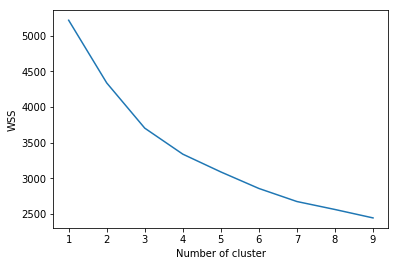

In [44]:
plt.figure()
plt.plot(list(wss.keys()), list(wss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.show()

#### Checking for cluster stability

In [45]:
from sklearn.metrics import adjusted_rand_score
import numpy as np

In [46]:
X_train_std=pd.DataFrame(X_train_std)

In [47]:
X_train_std.shape

(652, 8)

In [48]:
indices=X_train_std.sample(frac=0.9,random_state=1234).index
print(indices)

Int64Index([366, 266, 156, 572, 187, 327, 378, 146, 494, 240,
            ...
            346, 354, 256, 340, 183, 574, 434, 334, 235, 311],
           dtype='int64', length=587)


In [49]:
Alpha=X_train_std.iloc[indices,:]

In [50]:
Alpha.shape

(587, 8)

In [51]:
kmeans = KMeans(n_clusters=2)
kmeans1 = kmeans.fit(X_train_std)
print(len(kmeans1.labels_))
X_train_std['clus']=kmeans1.labels_

652


In [52]:
kmeans = KMeans(n_clusters=2)
kmeans2=kmeans.fit(Alpha)
print(len(kmeans2.labels_))
Alpha['clus']=kmeans2.labels_

587


/home/bhargavi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
Alpha.shape

(587, 9)

In [54]:
g1=X_train_std.loc[indices,'clus']
g2=Alpha.clus

#x=pd.DataFrame()
#x.head(20)

In [55]:
adjusted_rand_score(g1,g2)

0.9727018165995106